### Importación de datos



In [155]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [156]:
print("--- RANKING DE FACTURACIÓN ---")
facturacion = {}

for nombre, df in dfs.items():
    total = df['Precio'].sum()
    facturacion[nombre] = total

# Convertimos a Serie para una mejor visualización y ordenamos de mayor a menor
ranking_facturacion = pd.Series(facturacion).sort_values(ascending=False)

# Formato de moneda para una presentación profesional
print(ranking_facturacion.apply(lambda x: "${:,.0f}".format(x)))

--- RANKING DE FACTURACIÓN ---
Tienda 1    $1,150,880,400
Tienda 2    $1,116,343,500
Tienda 3    $1,098,019,600
Tienda 4    $1,038,375,700
dtype: object


### 1.1 Grafico ranking de facturación

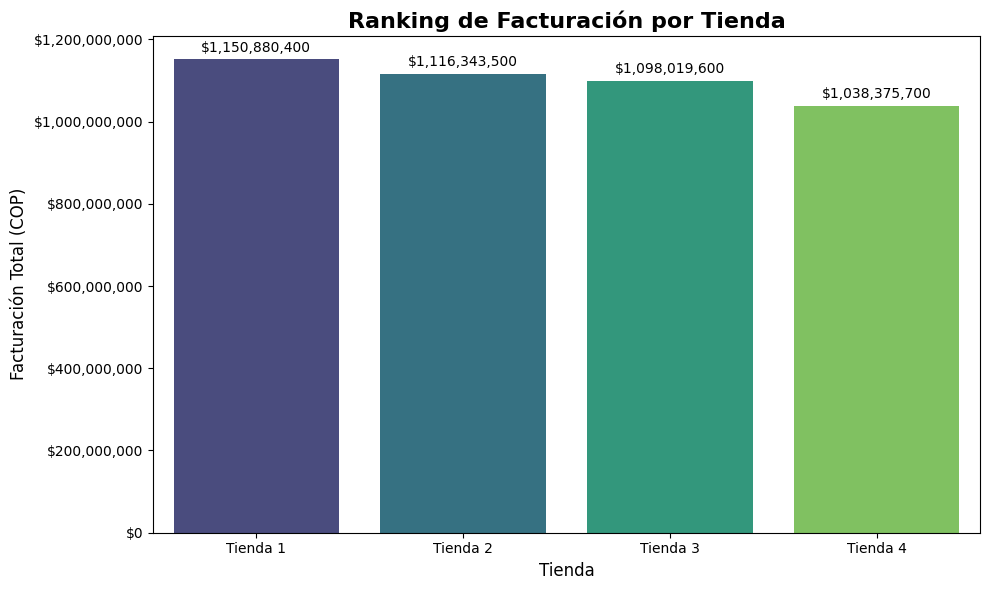

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ranking_facturacion.index, y=ranking_facturacion.values, hue=ranking_facturacion.index, palette='viridis', legend=False)
plt.title('Ranking de Facturación por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación Total (COP)', fontsize=12)

# Formatea el eje Y como moneda
fmt = '${x:,.0f}'
tick = mticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Añade etiquetas de datos a las barras
for index, value in enumerate(ranking_facturacion.values):
    ax.text(index, value + (ranking_facturacion.max() * 0.01), f'${value:,.0f}', color='black', ha="center", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

### 2.1 Categoría más popular por tienda

In [158]:
print("--- CATEGORÍA MÁS POPULAR POR TIENDA ---")

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, idxmax() obtiene el nombre de la categoría más frecuente
    top_cat = df['Categoría del Producto'].value_counts().idxmax()
    cantidad = df['Categoría del Producto'].value_counts().max()
    print(f"{nombre}: {top_cat} ({cantidad} ventas)")

--- CATEGORÍA MÁS POPULAR POR TIENDA ---
Tienda 1: Muebles (465 ventas)
Tienda 2: Muebles (442 ventas)
Tienda 3: Muebles (499 ventas)
Tienda 4: Muebles (480 ventas)


### 2.2 Categoría menos popular por tienda

In [159]:
print("--- CATEGORÍA MENOS POPULAR POR TIENDA ---")

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, idxmin() obtiene el nombre de la categoría menos frecuente
    bottom_cat = df['Categoría del Producto'].value_counts().idxmin()
    cantidad = df['Categoría del Producto'].value_counts().min()
    print(f"{nombre}: {bottom_cat} ({cantidad} ventas)")

--- CATEGORÍA MENOS POPULAR POR TIENDA ---
Tienda 1: Artículos para el hogar (171 ventas)
Tienda 2: Artículos para el hogar (181 ventas)
Tienda 3: Instrumentos musicales (177 ventas)
Tienda 4: Instrumentos musicales (170 ventas)


### 2.3 Categorías más populares por tienda


In [160]:
print("--- TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ---")

# Definimos el número de categorías que queremos mostrar
num_top_categories = 3

for nombre, df in dfs.items():
    print(f"\n{nombre}:")
    # value_counts() cuenta las ocurrencias, nlargest() obtiene las N categorías más grandes
    top_categories = df['Categoría del Producto'].value_counts().nlargest(num_top_categories)
    for cat, count in top_categories.items():
        print(f"  - {cat} ({count} ventas)")

--- TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ---

Tienda 1:
  - Muebles (465 ventas)
  - Electrónicos (448 ventas)
  - Juguetes (324 ventas)

Tienda 2:
  - Muebles (442 ventas)
  - Electrónicos (422 ventas)
  - Juguetes (313 ventas)

Tienda 3:
  - Muebles (499 ventas)
  - Electrónicos (451 ventas)
  - Juguetes (315 ventas)

Tienda 4:
  - Muebles (480 ventas)
  - Electrónicos (451 ventas)
  - Juguetes (338 ventas)


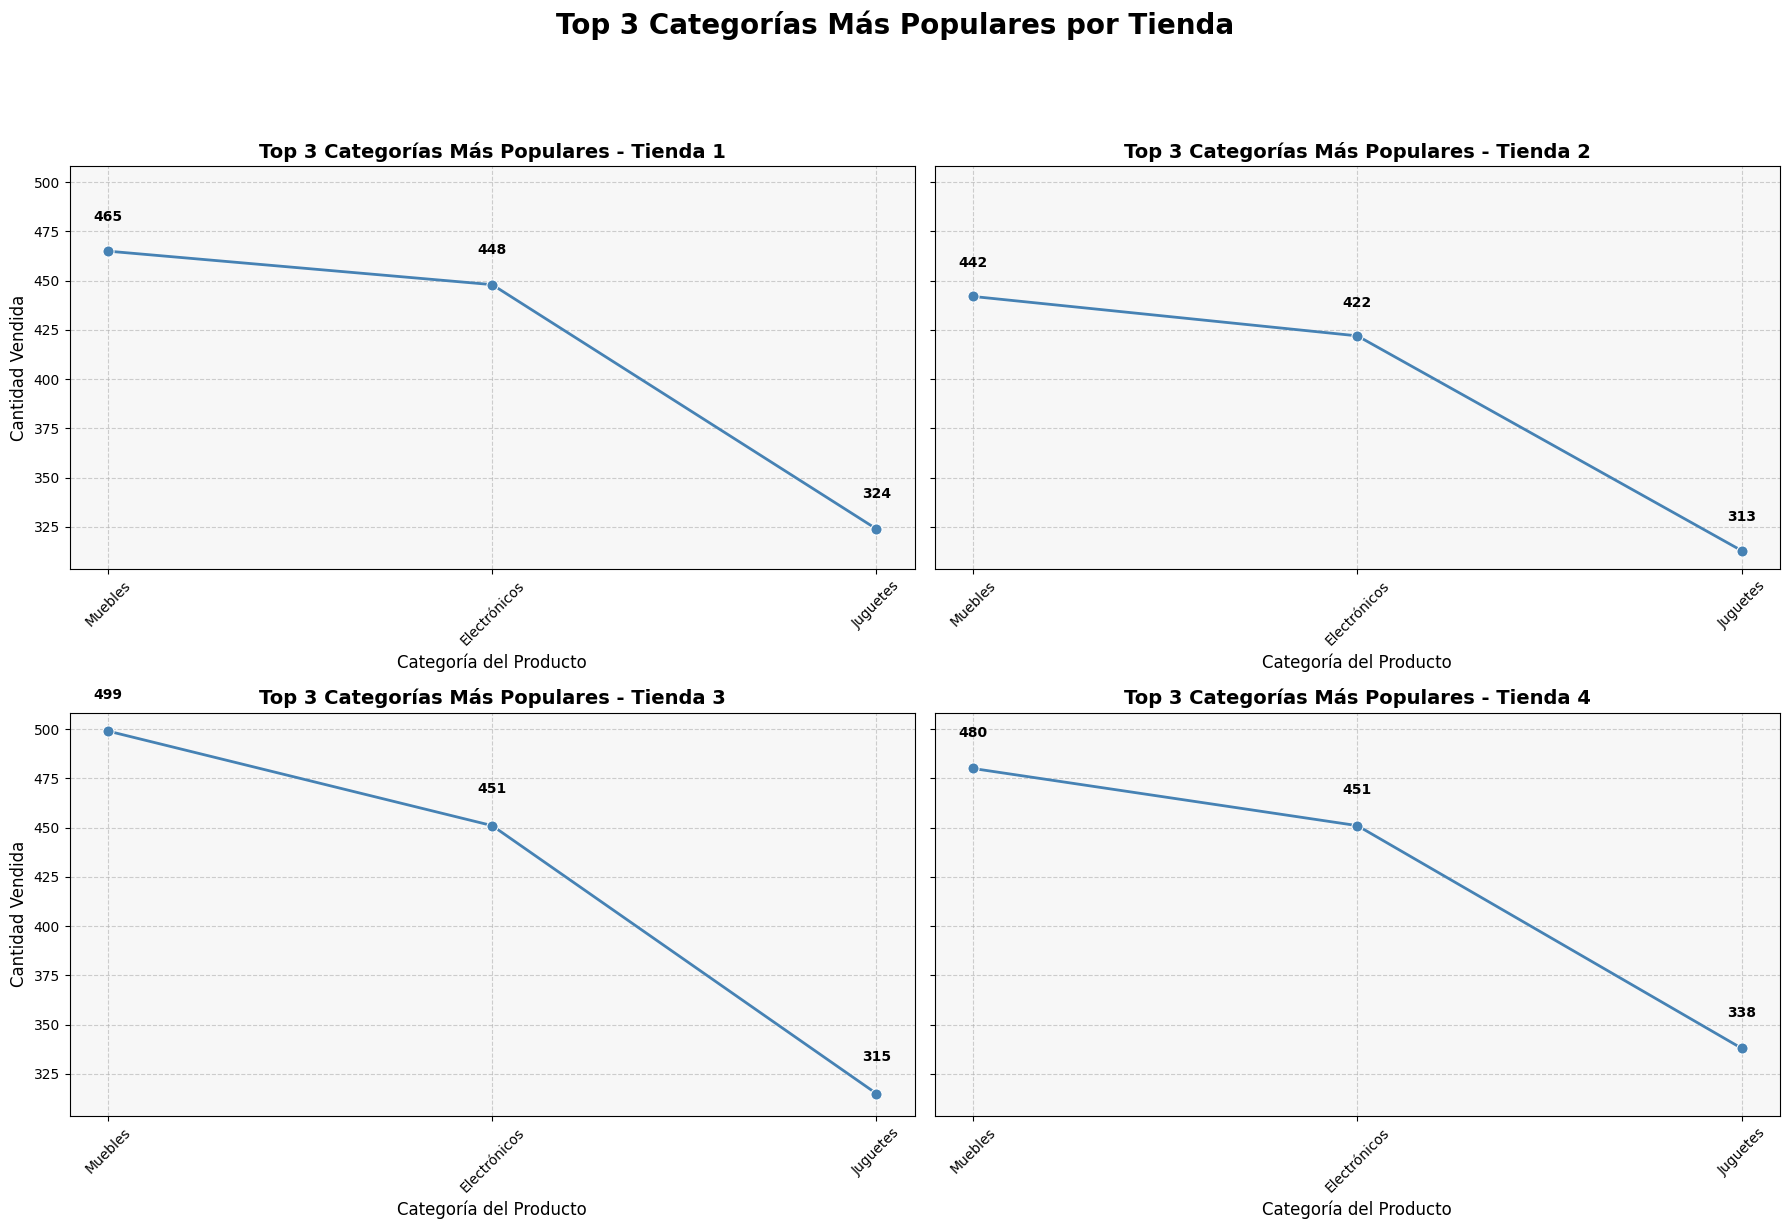

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

dfs = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

num_top_categories = 3

# Creamos una lista para almacenar los top 3 de cada tienda
top_categories_data = []

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, nlargest() toma las N mayores
    top_categories = df['Categoría del Producto'].value_counts().nlargest(num_top_categories).reset_index()
    top_categories.columns = ['Categoría del Producto', 'Cantidad Vendida']
    top_categories['Tienda'] = nombre
    top_categories_data.append(top_categories)

# Concatenamos todos los DataFrames en uno solo
df_top_categories = pd.concat(top_categories_data, ignore_index=True)

# Crear los gráficos de líneas facetados (uno por tienda)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharey=True) # Increased figure size for better readability
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

plt.suptitle('Top 3 Categorías Más Populares por Tienda', y=1.02, fontsize=20, fontweight='bold') # Larger suptitle

for i, nombre_tienda in enumerate(df_top_categories['Tienda'].unique()):
    df_store = df_top_categories[df_top_categories['Tienda'] == nombre_tienda]
    ax = axes[i]

    sns.lineplot(
        data=df_store,
        x='Categoría del Producto',
        y='Cantidad Vendida',
        marker='o', # Add markers to points
        ax=ax, # Specify the subplot axis
        color='steelblue', # Explicitly set a single color to avoid palette warning and make consistent
        linewidth=2, # Make line a bit thicker
        markersize=8, # Make markers a bit larger
        legend=False
    )

    # Añadir el número de ventas en cada punto de la línea
    for x_val, y_val, label_val in zip(df_store['Categoría del Producto'], df_store['Cantidad Vendida'], df_store['Cantidad Vendida']):
        ax.text(x_val, y_val + (df_store['Cantidad Vendida'].max() * 0.03), # Slightly increased vertical offset
                f'{label_val}',
                color='black',
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold') # Make labels bold

    ax.set_title(f'Top 3 Categorías Más Populares - {nombre_tienda}', fontsize=14, fontweight='bold') # Larger, bold subplot title
    ax.set_xlabel('Categoría del Producto', fontsize=12) # Larger x-label
    ax.set_ylabel('Cantidad Vendida', fontsize=12) # Larger y-label
    ax.tick_params(axis='x', rotation=45, labelsize=10) # Set x-tick label size
    ax.tick_params(axis='y', labelsize=10) # Set y-tick label size
    ax.grid(True, linestyle='--', alpha=0.6) # Slightly reduced alpha for grid
    ax.set_facecolor('#f7f7f7') # Light grey background for professional look

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjusted rect to accommodate larger suptitle
plt.show()

### 2.4 Gráfico de ventas Totales por Categoría para Cada Tienda

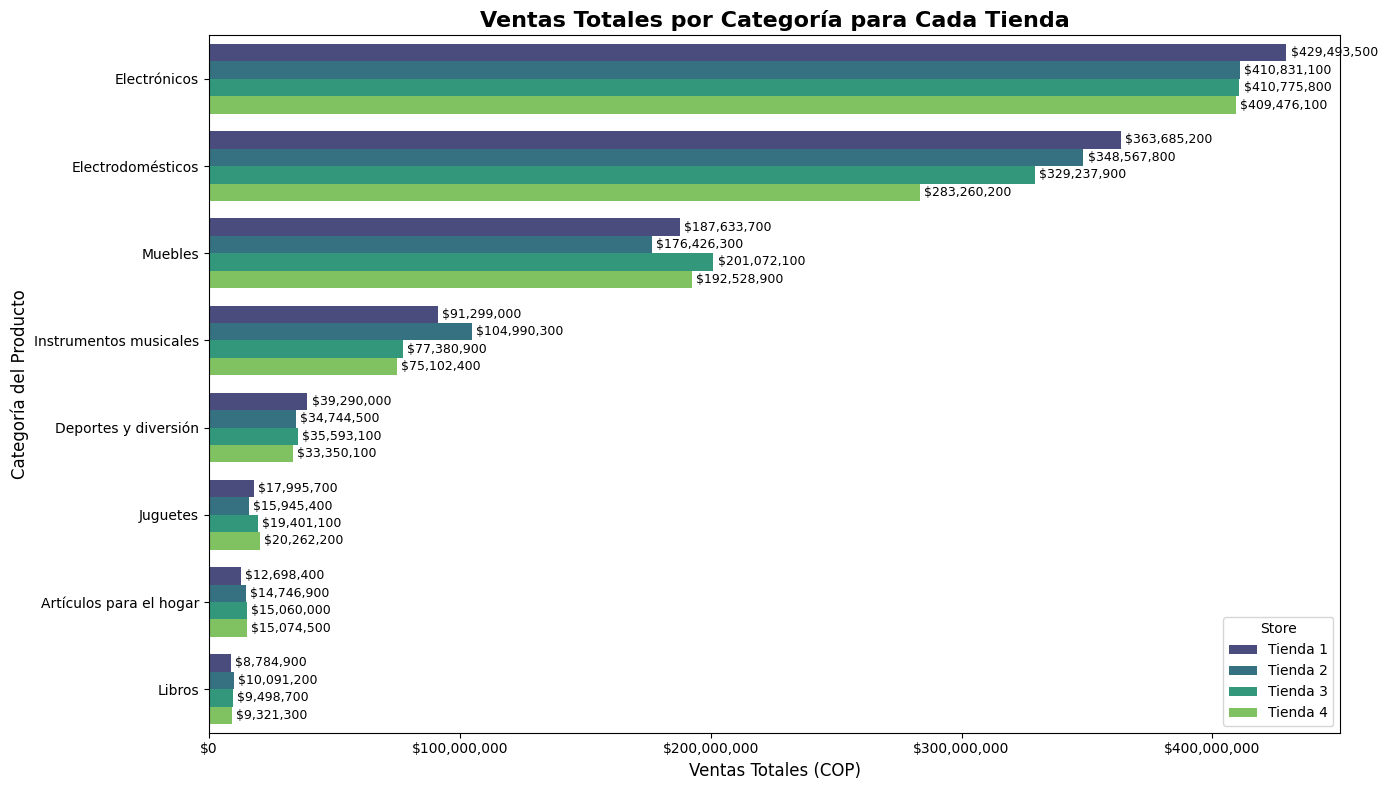

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd


if 'dfs' not in locals():
    url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

    tienda = pd.read_csv(url)
    tienda2 = pd.read_csv(url2)
    tienda3 = pd.read_csv(url3)
    tienda4 = pd.read_csv(url4)

    dfs = {
        'Tienda 1': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }

combined_sales_data = []
for nombre, df in dfs.items():
    category_sales = df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    category_sales['Store'] = nombre
    combined_sales_data.append(category_sales)

combined_sales_df = pd.concat(combined_sales_data, ignore_index=True)

# Establece un tamaño de figura más grande para una mejor legibilidad
plt.figure(figsize=(14, 8))

# Ordenar las categorías por la suma total de ventas para cada categoría en todas las tiendas
# Esto creará un orden global para las categorías en el eje Y
order_categories = combined_sales_df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).index

# Crea el gráfico de barras agrupado usando seaborn
ax = sns.barplot(
    data=combined_sales_df,
    x='Precio',
    y='Categoría del Producto',
    hue='Store',
    palette='viridis',
    order=order_categories # Aplicar el orden global a las categorías del eje Y
)

# Añade título y etiquetas para mayor claridad
plt.title('Ventas Totales por Categoría para Cada Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Ventas Totales (COP)', fontsize=12)
plt.ylabel('Categoría del Producto', fontsize=12)

# Formatear el eje X como moneda
fmt = '${x:,.0f}'
tick = mticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Añadir etiquetas de datos en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=3, fontsize=9)

# Mejora el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

# 3. Calificación promedio de la tienda


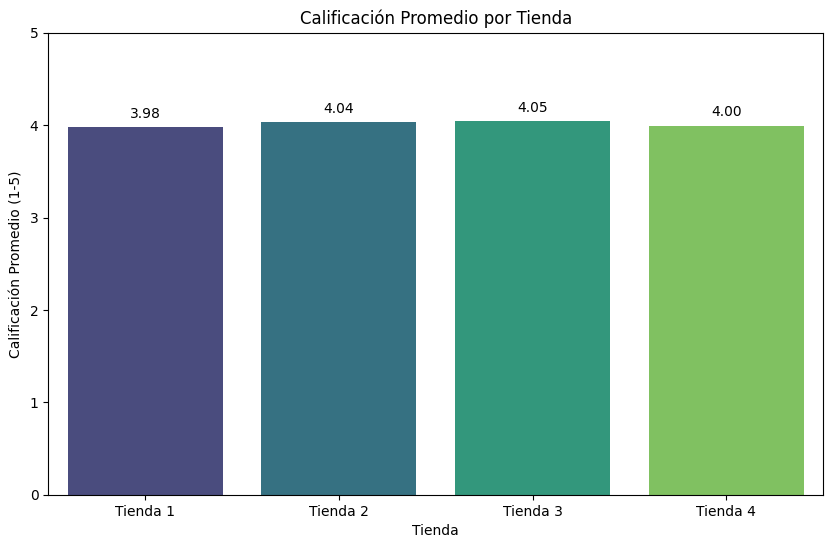

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combina todos los dataframes de las tiendas en un solo dataframe con un identificador 'Tienda'
all_stores_df = []
for nombre, df in dfs.items():
    df_temp = df.copy() # Trabaja en una copia para evitar modificar los dataframes originales
    df_temp['Tienda'] = nombre
    all_stores_df.append(df_temp)

df_total = pd.concat(all_stores_df, ignore_index=True)

# Promedio de calificación
calificacion_promedio = df_total.groupby('Tienda')['Calificación'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, hue=calificacion_promedio.index, palette='viridis', legend=False)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.xlabel('Tienda')
plt.ylim(0, 5) # Escala real de calificación

# Añade el resultado promedio en número a cada barra
for index, value in enumerate(calificacion_promedio.values):
    ax.text(index, value + 0.1, f'{value:.2f}', color='black', ha="center")

plt.show()

# 4. Productos más y menos vendidos

### 4.1 top 5 productos más vendidos por tienda

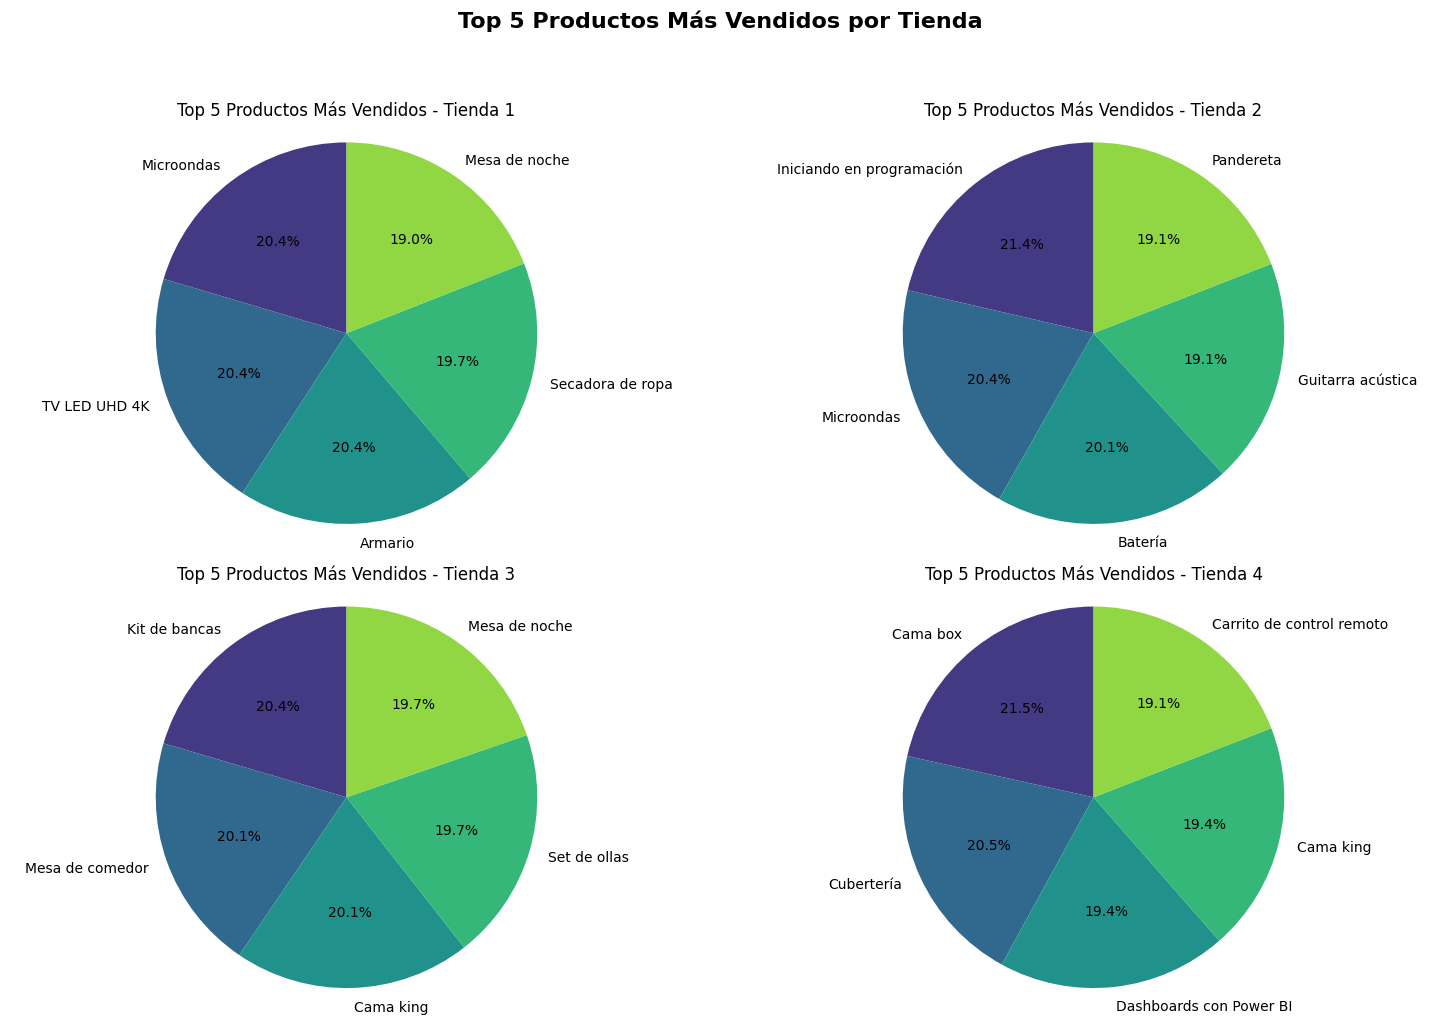

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_total' not in locals():
    all_stores_df = []
    for nombre, df_store in dfs.items():
        df_temp = df_store.copy()
        df_temp['Tienda'] = nombre
        all_stores_df.append(df_temp)
    df_total = pd.concat(all_stores_df, ignore_index=True)

# Obtener los top 5 productos más vendidos por tienda
top_productos_por_tienda = []
for nombre_tienda in df_total['Tienda'].unique():
    df_tienda = df_total[df_total['Tienda'] == nombre_tienda]
    top_productos = df_tienda['Producto'].value_counts().head(5).reset_index()
    top_productos.columns = ['Producto', 'Cantidad Vendida']
    top_productos['Tienda'] = nombre_tienda
    top_productos_por_tienda.append(top_productos)

df_top_productos = pd.concat(top_productos_por_tienda, ignore_index=True)

# Crear los gráficos de pastel facetados (uno por tienda)
plt.figure(figsize=(15, 10)) # Ajusta el tamaño general de la figura

for i, nombre_tienda in enumerate(df_top_productos['Tienda'].unique()):
    plt.subplot(2, 2, i + 1) # Crea subgráficos 2x2
    df_tienda = df_top_productos[df_top_productos['Tienda'] == nombre_tienda]

    # Generar el gráfico de pastel
    plt.pie(df_tienda['Cantidad Vendida'],
            labels=df_tienda['Producto'],
            autopct='%1.1f%%', # Formato de porcentaje
            startangle=90, # Ángulo de inicio
            colors=sns.color_palette('viridis', len(df_tienda)))

    plt.title(f'Top 5 Productos Más Vendidos - {nombre_tienda}', fontsize=12)
    plt.axis('equal') # Asegura que el gráfico de pastel sea un círculo.

plt.suptitle('Top 5 Productos Más Vendidos por Tienda', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar superposiciones
plt.show()

### 4.2 top 5 productos menos vendidos por tienda

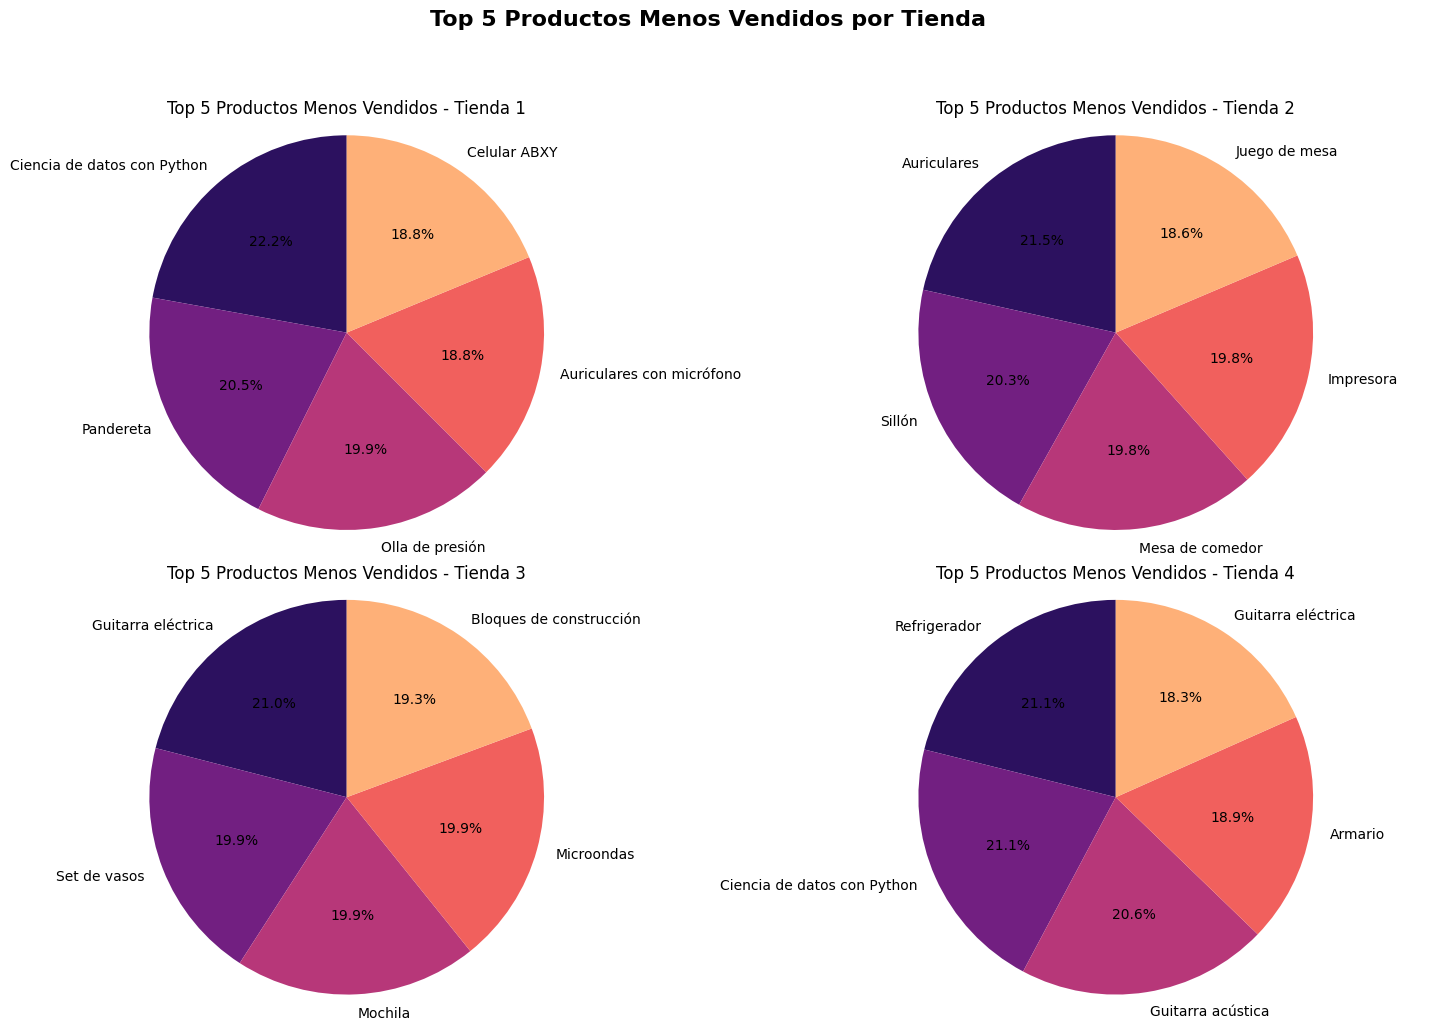

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 5 productos menos vendidos por tienda
bottom_productos_por_tienda = []
for nombre_tienda in df_total['Tienda'].unique():
    df_tienda = df_total[df_total['Tienda'] == nombre_tienda]
    # value_counts().tail(5) para obtener los 5 productos menos vendidos
    bottom_productos = df_tienda['Producto'].value_counts().tail(5).reset_index()
    bottom_productos.columns = ['Producto', 'Cantidad Vendida']
    bottom_productos['Tienda'] = nombre_tienda
    bottom_productos_por_tienda.append(bottom_productos)

df_bottom_productos = pd.concat(bottom_productos_por_tienda, ignore_index=True)

# Crear los gráficos de pastel facetados (uno por tienda)
plt.figure(figsize=(15, 10)) # Ajusta el tamaño general de la figura

for i, nombre_tienda in enumerate(df_bottom_productos['Tienda'].unique()):
    plt.subplot(2, 2, i + 1) # Crea subgráficos 2x2
    df_tienda_bottom = df_bottom_productos[df_bottom_productos['Tienda'] == nombre_tienda]

    # Generar el gráfico de pastel
    plt.pie(df_tienda_bottom['Cantidad Vendida'],
            labels=df_tienda_bottom['Producto'],
            autopct='%1.1f%%', # Formato de porcentaje
            startangle=90, # Ángulo de inicio
            colors=sns.color_palette('magma', len(df_tienda_bottom)))

    plt.title(f'Top 5 Productos Menos Vendidos - {nombre_tienda}', fontsize=12)
    plt.axis('equal') # Asegura que el gráfico de pastel sea un círculo.

plt.suptitle('Top 5 Productos Menos Vendidos por Tienda', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar superposiciones
plt.show()

# 5. Envío promedio por tienda

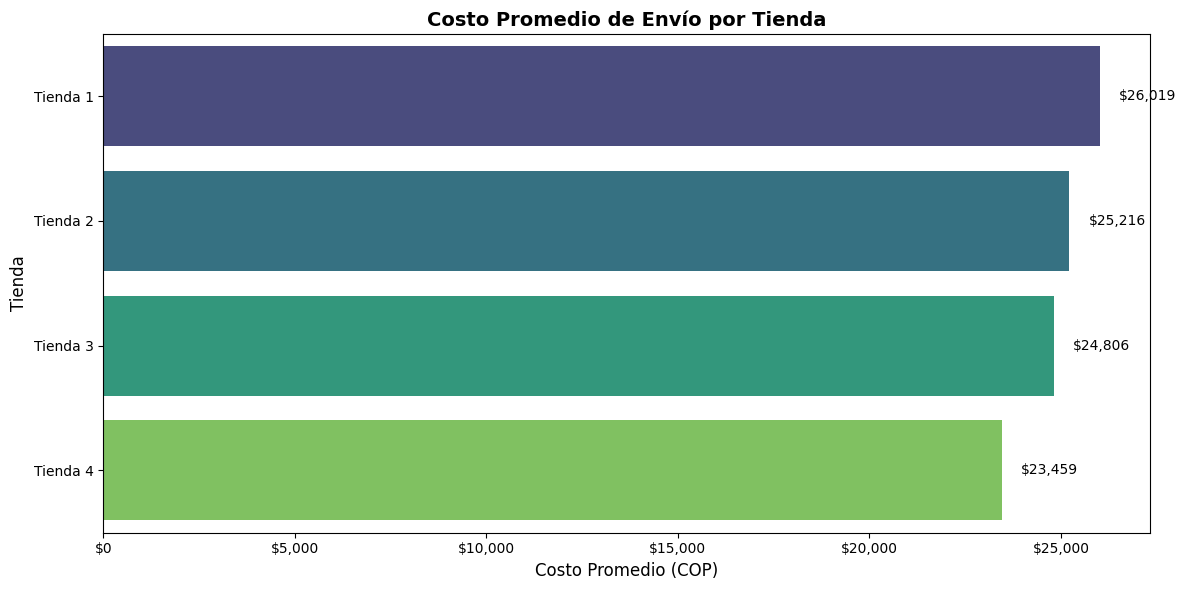

In [166]:
import matplotlib.ticker as mticker # Importa el módulo ticker

# Promedio de costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
# ¡Aquí se invierten x e y para hacerlo horizontal!
sns.barplot(x=envio_promedio.values, y=envio_promedio.index, hue=envio_promedio.index, palette='viridis', legend=False)
plt.title('Costo Promedio de Envío por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Costo Promedio (COP)', fontsize=12) # Ahora el eje X es el costo
plt.ylabel('Tienda', fontsize=12) # Ahora el eje Y son las tiendas

# Formatea el eje X como moneda (antes era el eje Y)
fmt = '${x:,.0f}'
tick = mticker.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)

# Añade etiquetas de datos al final de las barras horizontales
for index, value in enumerate(envio_promedio.values):
    # Se ajusta la posición del texto: 'value' es la coordenada x, 'index' es la y
    # 'ha='left'' para alinear el texto a la izquierda del punto (value, index)
    # 'va='center'' para centrar verticalmente el texto en la barra
    plt.text(value + 500, index, f'${value:,.0f}', ha='left', va='center', fontsize=10)

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

# 6. **Analisis de los datos**

In [167]:
store_analysis_summary = {}

for nombre_tienda in dfs.keys():
    store_analysis_summary[nombre_tienda] = {
        "Facturación Total": ranking_facturacion.get(nombre_tienda, "N/A"),
        "Calificación Promedio": calificacion_promedio.get(nombre_tienda, "N/A"),
        "Costo Promedio de Envío": envio_promedio.get(nombre_tienda, "N/A"),
        "Top 3 Categorías Más Populares": df_top_categories[df_top_categories['Tienda'] == nombre_tienda].to_dict('records'),
        "Top 5 Productos Más Vendidos": df_top_productos[df_top_productos['Tienda'] == nombre_tienda].to_dict('records'),
        "Top 5 Productos Menos Vendidos": df_bottom_productos[df_bottom_productos['Tienda'] == nombre_tienda].to_dict('records'),
        "Ventas Totales por Categoría": combined_sales_df[combined_sales_df['Store'] == nombre_tienda].to_dict('records')
    }

# Imprime el resumen consolidado
import json
print(json.dumps(store_analysis_summary, indent=4, ensure_ascii=False))

{
    "Tienda 1": {
        "Facturación Total": 1150880400.0,
        "Calificación Promedio": 3.976685036032217,
        "Costo Promedio de Envío": 26018.60958033065,
        "Top 3 Categorías Más Populares": [
            {
                "Categoría del Producto": "Muebles",
                "Cantidad Vendida": 465,
                "Tienda": "Tienda 1"
            },
            {
                "Categoría del Producto": "Electrónicos",
                "Cantidad Vendida": 448,
                "Tienda": "Tienda 1"
            },
            {
                "Categoría del Producto": "Juguetes",
                "Cantidad Vendida": 324,
                "Tienda": "Tienda 1"
            }
        ],
        "Top 5 Productos Más Vendidos": [
            {
                "Producto": "Microondas",
                "Cantidad Vendida": 60,
                "Tienda": "Tienda 1"
            },
            {
                "Producto": "TV LED UHD 4K",
                "Cantidad Vendida": 60,
  

## Análisis Comparativo de Tiendas

### Comparación detallada entre las cuatro tiendas utilizando los datos consolidados, identificando patrones de rendimiento y áreas de debilidad.


## Recomendación de Venta

Basándonos en el análisis comparativo de las métricas clave, podemos identificar la tienda con el peor desempeño general.

**Métricas Clave Observadas:**

*   **Facturación Total:**
    *   Tienda 1: $1,150,880,400 (la más alta)
    *   Tienda 2: $1,116,343,500
    *   Tienda 3: $1,098,019,600
    *   Tienda 4: $1,038,375,700 (la más baja)

*   **Calificación Promedio:**
    *   Tienda 1: 3.98 (la más baja)
    *   Tienda 2: 4.04
    *   Tienda 3: 4.05 (la más alta)
    *   Tienda 4: 4.00

*   **Costo Promedio de Envío:**
    *   Tienda 1: $26,019 (el más alto)
    *   Tienda 2: $25,216
    *   Tienda 3: $24,806
    *   Tienda 4: $23,459 (el más bajo)


**Análisis Integrado y Recomendación:**

Aunque la **Tienda 4** presenta el costo promedio de envío más bajo, lo que podría parecer una ventaja, es crucial destacar que tiene la **facturación total más baja** de todas las tiendas. Su calificación promedio, aunque no es la más baja, tampoco la compensa significativamente.

Por otro lado, la **Tienda 1** tiene la **calificación promedio más baja** y el **costo promedio de envío más alto**. A pesar de tener la facturación más alta, estos dos factores (baja satisfacción del cliente y altos costos operativos de envío) representan desafíos significativos para su rentabilidad y sostenibilidad a largo plazo.

Considerando estos puntos, la **Tienda 1** es la candidata más fuerte para la venta o una reestructuración profunda. Si bien su facturación es la más alta, la combinación de la **peor calificación del cliente** y el **mayor costo de envío** sugiere problemas fundamentales en la experiencia del cliente y la eficiencia operativa. Una baja calificación puede impactar negativamente las ventas futuras y la reputación, mientras que los altos costos de envío erosionan los márgenes de beneficio. Priorizar la venta de la Tienda 1 permitiría a la empresa redirigir recursos a las otras tiendas con mejor balance entre facturación, calificación y eficiencia de costos.

**Por lo tanto, se recomienda la venta de la Tienda 1** debido a la combinación de la calificación promedio más baja y el costo promedio de envío más alto, lo que indica problemas subyacentes de satisfacción del cliente y eficiencia operativa que podrían limitar su crecimiento y rentabilidad a pesar de su alta facturación.

# Extra: Consolidación de datos para el Análisis Geográfico

In [168]:
import pandas as pd

# Asegura que los dataframes individuales de las tiendas se carguen si el entorno fue reiniciado
# Este bloque se añade para robustez, asumiendo que estos podrían no estar en el ámbito si las celdas anteriores no se ejecutaron.
if 'tienda' not in locals():
    url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

    tienda = pd.read_csv(url)
    tienda2 = pd.read_csv(url2)
    tienda3 = pd.read_csv(url3)
    tienda4 = pd.read_csv(url4)

    dfs = {
        'Tienda 1': tienda,
        'Tienda 2': tienda2,
        'Tienda 3': tienda3,
        'Tienda 4': tienda4
    }

# 1. Inicializa una lista vacía llamada all_stores_df.
all_stores_df = []

# 2. Itera sobre el diccionario dfs para cada tienda:
for nombre, df_store in dfs.items():
    # a. Crea una copia del DataFrame de la tienda para evitar modificar el original.
    df_temp = df_store.copy()
    # b. Añade una nueva columna llamada 'Tienda' a esta copia, asignándole el nombre de la tienda.
    df_temp['Tienda'] = nombre
    # c. Añade esta copia modificada a la lista all_stores_df.
    all_stores_df.append(df_temp)

# 3. Concatena todos los DataFrames de la lista all_stores_df en un único DataFrame llamado df_total.
df_total = pd.concat(all_stores_df, ignore_index=True)

# 4. Selecciona únicamente las columnas 'lat', 'lon', 'Precio', 'Calificación' y 'Tienda' del df_total resultante.
df_total = df_total[['lat', 'lon', 'Precio', 'Calificación', 'Tienda']]

print("DataFrame 'df_total' consolidado y listo para análisis geográfico.")
print(df_total.head())

DataFrame 'df_total' consolidado y listo para análisis geográfico.
        lat       lon    Precio  Calificación    Tienda
0   4.60971 -74.08175  164300.0             4  Tienda 1
1   6.25184 -75.56359  192300.0             1  Tienda 1
2  10.39972 -75.51444  209600.0             1  Tienda 1
3   3.43722 -76.52250  757500.0             4  Tienda 1
4   6.25184 -75.56359  335200.0             5  Tienda 1


## Visualizar Distribución de Ventas Geográficamente

Gráfico de dispersión facetado (uno por cada tienda) muestra las coordenadas 'lon' y 'lat' de cada venta. Se utiliza el color de los puntos para representar el 'Precio' de la transacción, permitiendo identificar visualmente las áreas con mayor volumen de ventas o ingresos.


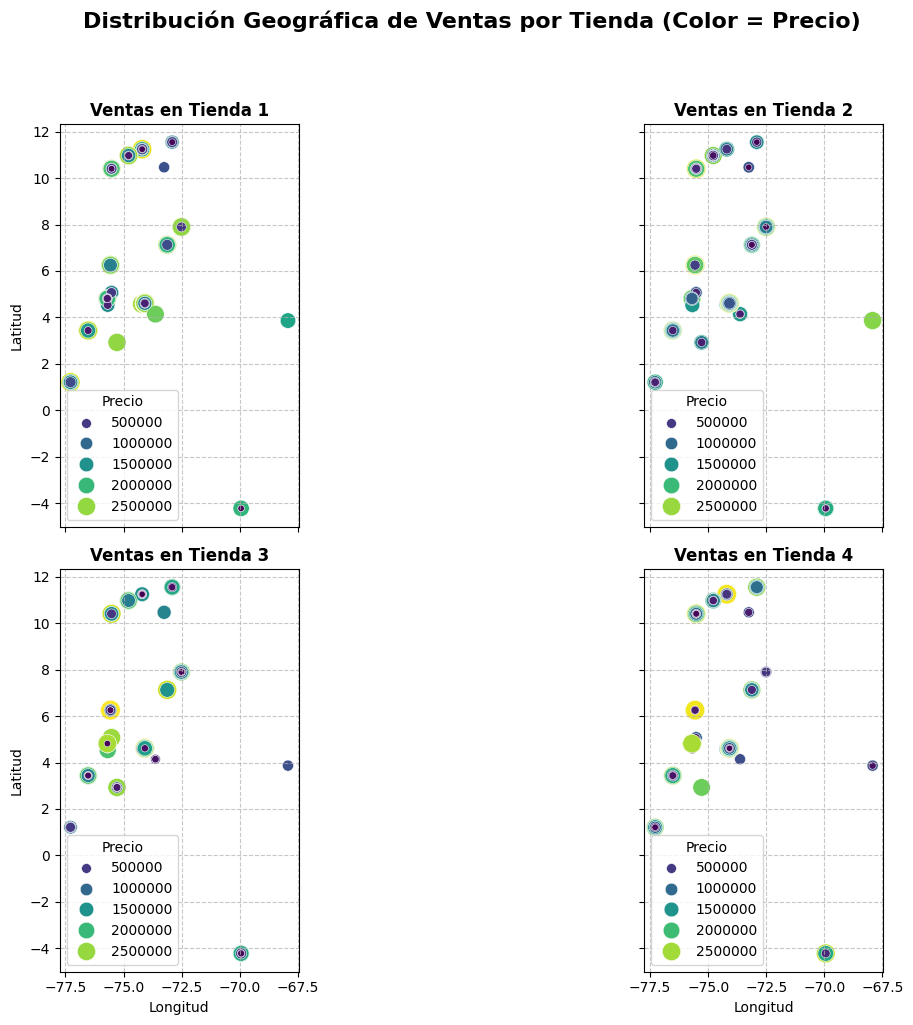

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtiene los nombres únicos de las tiendas para el trazado facetado
unique_stores = df_total['Tienda'].unique()
num_stores = len(unique_stores)

# Determina el tamaño de la cuadrícula de subgráficos (ej., 2x2 para 4 tiendas)
# Esto puede hacerse más dinámico para diferentes números de tiendas
if num_stores <= 2:
    n_rows, n_cols = 1, num_stores
elif num_stores == 3:
    n_rows, n_cols = 1, 3
elif num_stores == 4:
    n_rows, n_cols = 2, 2
else:
    n_rows, n_cols = (num_stores + 1) // 2, 2 # Ajusta según sea necesario para más tiendas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten() # Aplana el array de ejes para una fácil iteración

fig.suptitle('Distribución Geográfica de Ventas por Tienda (Color = Precio)', fontsize=16, fontweight='bold', y=1.02)

for i, store_name in enumerate(unique_stores):
    ax = axes[i]
    store_data = df_total[df_total['Tienda'] == store_name]

    sns.scatterplot(
        data=store_data,
        x='lon',
        y='lat',
        hue='Precio', # Colorea los puntos por 'Precio'
        size='Precio', # Usa 'Precio' para determinar también el tamaño del marcador
        sizes=(20, 200), # Rango de tamaños de marcador
        palette='viridis', # Mapa de colores para 'Precio'
        ax=ax,
        legend='brief'
    )

    ax.set_title(f'Ventas en {store_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_aspect('equal', adjustable='box') # Mantiene la relación de aspecto para coordenadas geográficas

# Oculta cualquier subgráfico no utilizado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar la superposición del título principal
plt.show()

## Visualizar Calificaciones de Clientes Geográficamente

Gráficos de dispersión facetado (uno por cada tienda) muestran las coordenadas 'lon' y 'lat' de cada compra. Utilizando el color de los puntos para representar la 'Calificación' del cliente, lo que ayudará a observar si existen patrones geográficos en la satisfacción del cliente.


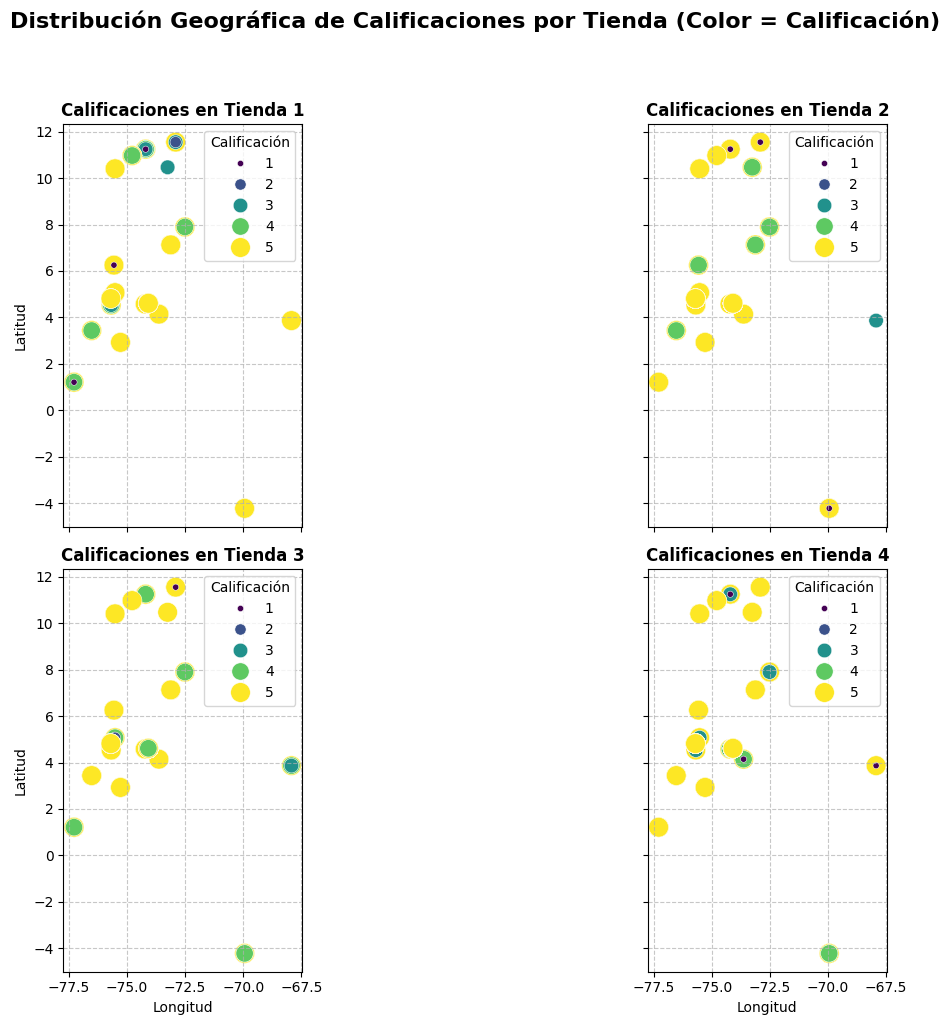

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtiene una lista de los nombres de tiendas únicas del DataFrame df_total.
unique_stores_rating = df_total['Tienda'].unique()
num_stores_rating = len(unique_stores_rating)

# 2. Determina un diseño de cuadrícula apropiado para los subgráficos.
# Esto puede ser dinámico para diferentes números de tiendas
if num_stores_rating <= 2:
    n_rows_rating, n_cols_rating = 1, num_stores_rating
elif num_stores_rating == 3:
    n_rows_rating, n_cols_rating = 1, 3
elif num_stores_rating == 4:
    n_rows_rating, n_cols_rating = 2, 2
else:
    # Para más de 4 tiendas, ajusta el diseño si es necesario
    n_rows_rating, n_cols_rating = (num_stores_rating + 1) // 2, 2 # Ejemplo de ajuste

# 3. Crea una figura y un conjunto de subgráficos.
fig_rating, axes_rating = plt.subplots(n_rows_rating, n_cols_rating, figsize=(15, 10), sharex=True, sharey=True)
axes_rating = axes_rating.flatten() # Aplana el array de ejes para facilitar la iteración

# 4. Establece un título principal para la figura.
fig_rating.suptitle('Distribución Geográfica de Calificaciones por Tienda (Color = Calificación)', fontsize=16, fontweight='bold', y=1.02)

# 5. Itera sobre cada nombre de tienda única:
for i, store_name in enumerate(unique_stores_rating):
    ax = axes_rating[i]
    # a. Filtra df_total para obtener solo los datos de la tienda actual.
    store_data_rating = df_total[df_total['Tienda'] == store_name]

    # b. Crea un gráfico de dispersión con 'lon', 'lat' y 'Calificación' mapeada al color y tamaño.
    sns.scatterplot(
        data=store_data_rating,
        x='lon',
        y='lat',
        hue='Calificación', # Color de los puntos por 'Calificación'
        size='Calificación', # Tamaño de los puntos por 'Calificación'
        sizes=(20, 200), # Rango de tamaño de los marcadores
        palette='viridis', # Paleta de colores para 'Calificación'
        ax=ax,
        legend='brief'
    )

    # c. Establece un título para el subgráfico.
    ax.set_title(f'Calificaciones en {store_name}', fontsize=12, fontweight='bold')
    # d. Añade etiquetas para el eje x y el eje y.
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)
    # e. Agrega una cuadrícula al subgráfico.
    ax.grid(True, linestyle='--', alpha=0.7)
    # f. Asegura que la relación de aspecto del subgráfico sea 'equal'.
    ax.set_aspect('equal', adjustable='box')

# 6. Elimina cualquier subgráfico no utilizado
for j in range(i + 1, len(axes_rating)):
    fig_rating.delaxes(axes_rating[j])

# 7. Ajusta el diseño de la figura.
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta el diseño para evitar superposiciones con el título
# 8. Muestra el gráfico resultante.
plt.show()

# Análisis de Patrones Geográficos

Con base en los gráficos generados, interpretaremos los patrones geográficos observados en las ventas y las calificaciones. Identificaremos áreas de alta concentración de ventas, regiones con rendimiento superior o inferior para ciertas tiendas, y cualquier influencia geográfica en los ingresos y la satisfacción del cliente.


## Análisis Detallado de Patrones Geográficos: Interpretación Clave de los Patrones Geográficos observados en Ventas y Calificaciones


### Análisis Geográfico

Este análisis utiliza las coordenadas geográficas (`lat`, `lon`) de las ventas para visualizar la distribución de ingresos (`Precio`) y la satisfacción del cliente (`Calificación`) por cada tienda. El objetivo es proporcionando una perspectiva visual y espacial que complemente el análisis agregado y fundamente una decisión, permitiendo identificar dónde se generan los ingresos y la satisfacción, y dónde no, ofreciendo una perspectiva crucial para la decisión de venta de una tienda.

### Patrones Geográficos de Ventas (`Precio`)
  Las visualizaciones de la distribución de `Precio` por tienda revelan:

  *   **Concentraciones de Alto Valor:**
      *   Identificación de **micro-regiones donde se genera el mayor volumen de ingresos** para cada tienda (puntos grandes y colores intensos). Estas son las 'zonas calientes' que contribuyen significativamente a la facturación.
      *   **Implicación para el Sr. Juan:** Entender si la alta facturación de **Tienda 1** está muy concentrada en pocas ciudades o si es más dispersa. Una alta concentración podría significar dependencia de mercados clave, mientras que una dispersión con bajo volumen (como podría ser el caso de **Tienda 4**) podría indicar una base de clientes amplia pero menos lucrativa por transacción.

  *   **Áreas de Oportunidad o Saturación:**
      *   Regiones con **baja densidad de puntos o puntos de bajo valor** (`Precio` pequeño y color tenue). Podrían ser mercados inexplorados, o zonas con fuerte competencia o ineficiencias logísticas que limitan las ventas.
      *   **Implicación para el Sr. Juan:** Si una tienda muestra áreas de oportunidad inexploradas, podría ser una señal de crecimiento potencial. Si, por el contrario, muestra saturación con bajo retorno, podría indicar un mercado poco atractivo.

### Patrones Geográficos de Calificaciones (`Calificación`)
  Las visualizaciones de la distribución de `Calificación` por tienda son cruciales para entender la satisfacción del cliente a nivel local.


  *   **Satisfacción del Cliente por Ubicación:** Los gráficos de dispersión de `Calificación` revelan cómo la satisfacción del cliente se distribuye geográficamente. Para **Tienda 1**, que tiene la calificación promedio más baja, es crítico observar si estas bajas calificaciones se concentran en las mismas áreas donde tiene altas ventas. Si es así, significa que está vendiendo mucho, pero dejando clientes insatisfechos en esas regiones clave, lo cual es insostenible a largo plazo. Si las bajas calificaciones están dispersas o en áreas de bajas ventas, el problema podría ser menos sistémico.

  *   **Diferencias Regionales en la Experiencia del Cliente:** Una tienda con una calificación promedio decente (como **Tienda 3**) podría tener focos de bajas calificaciones en regiones específicas, lo que indicaría problemas localizados (ej., un problema con un centro de distribución, un vendedor, o un tipo de producto específico que solo llega a esa zona). Esto permite una intervención quirúrgica en lugar de una reestructuración completa.

  *   **Implicación para el Sr. Juan:** Si **Tienda 1** tiene altas ventas pero bajas calificaciones en las mismas regiones, esto es una alerta roja. Sugiere que el éxito en ingresos se logra a expensas de la satisfacción del cliente, lo cual es insostenible y dañino para la reputación a largo plazo. Si las bajas calificaciones están dispersas o en áreas de bajas ventas, el problema podría ser menos sistémico.


### Implicaciones directas para la decisión del Sr. Juan

Al analizar conjuntamente los patrones geográficos de `Precio` y `Calificación`, se puede tomar una decisión más informada sobre qué tienda vender:


*   **Refuerzo de la Recomendación: Vender la Tienda 1**
    *   **Los gráficos muestran que Tienda 1**, a pesar de su alta facturación, tiene **altos `Precio` y bajas `Calificación` concentradas en las mismas regiones clave**, lo que valida fuertemente la recomendación de venta.
    *   Esto sugiere que la tienda está generando ingresos a expensas de la satisfacción del cliente en sus mercados más importantes, creando una bomba de tiempo en términos de reputación y fidelidad. El alto costo de envío ya señalado agrava esta situación, indicando ineficiencia incluso donde hay volumen.
    *   Incluso si las bajas calificaciones de **Tienda 1** están dispersas, el hecho de tener la peor calificación general y los mayores costos de envío ya son señales de alerta. Los patrones geográficos revelan si estos problemas son sistémicos a través de sus operaciones o si hay regiones que requieren una atención urgente.

*   **Evaluación del Potencial en Otras Tiendas:**
    *   **Tienda 4 (Menor Facturación pero Potencial): Los gráficos de Tienda 4** muestran una distribución geográfica de `Calificación` uniformemente buena, o incluso puntos de `Precio` bajos pero `Calificación` alta en ciertas regiones, lo que indica un gran potencial. Podría ser una tienda eficiente que solo necesita una inyección de marketing o una expansión estratégica para aumentar sus ventas sin comprometer la satisfacción del cliente. Vender esta tienda podría ser un error.
    *   **Tiendas 2 y 3 (Balance Saludable):** Para **Tienda 2** y **Tienda 3**, que tienen un mejor balance entre facturación, calificación y costos, los mapas geográficos ayudan a identificar las **mejores prácticas** en sus regiones de alto rendimiento (altos `Precio` y `Calificación`).
    *   **Implicación:** Estas prácticas exitosas pueden replicarse en otras áreas o tiendas, y los mapas también pueden señalar áreas específicas que necesiten ajustes, pero sin justificar una venta completa.


### Conclusiones:

Las visualizaciones geográficas confirman que la **Tienda 1** probablemente opera con un modelo de negocio que, si bien genera ingresos, no es sostenible debido a la insatisfacción del cliente y la ineficiencia logística, especialmente si estos problemas se concentran en sus áreas de mayor venta. Esto la convierte en la candidata más lógica para la desinversión, permitiendo al Sr. Juan reorientar recursos hacia tiendas con un fundamento más sólido para el crecimiento sostenible.

Las visualizaciones geográficas proporcionan una capa de comprensión fundamental que valida la recomendación inicial. La **Tienda 1** presenta un modelo de alto volumen con insatisfacción crítica y altos costos en sus mercados principales, haciendo que su venta sea la opción más estratégica para el Sr. Juan. Esta desinversión liberaría capital y recursos para fortalecer las operaciones de las otras tiendas con fundamentos más sólidos para un crecimiento sostenible y rentable.